In [ ]:
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
queries_train_dict = {
 "best marvel movie": [57069491, 65967176, 42163310, 878659, 27306717, 60952488, 60744481, 66111204, 41974555, 1074657, 41677925, 61073786, 43603241, 37497391, 44240443, 56289553, 55935213, 17296107, 60616450, 60774345, 41974496, 46208997, 5676692, 10589717, 5027882, 36439749, 59892, 33700618, 66423851, 55511148, 61651800, 58481694, 60283633, 48530084, 612052, 60754840, 22144990, 12673434, 56848986, 29129051, 709344, 44254295, 56289672, 33463661, 11891556], 
 "How do kids come to world?": [25490788, 6271835, 51046955, 83449, 46105, 56921904, 4827661, 5591344, 615418, 48490547, 36827305, 128987, 11436091, 15474, 11263877, 6236554, 30640885, 296627, 2535885, 1072968, 494299, 56480301, 1380383, 101942, 4332628, 14694092, 634139, 194687, 1151454, 35072597, 24470328, 42130800, 884998, 25084664, 79449, 43033258, 72214, 18863597, 73165, 1908019, 46504485, 29384326, 1357127, 387703, 19698110, 636806, 1833777, 239259, 44311171, 694630],
 "Information retrieval": [15271, 50716473, 19988623, 731640, 1185840, 442684, 24997830, 10179411, 39000674, 14473878, 33407925, 24963841, 509628, 261193, 18550455, 4694434, 11486091, 16635934, 296950, 38156944, 14109784, 20948989, 3781784, 5818361, 10328235, 14343887, 9511414, 743971, 10218640, 35804330, 7872152, 21106742, 36794719, 509624, 25130414, 25959000, 762092, 48317971, 25957127, 56598843],
 "LinkedIn": [970755, 50191962, 41726116, 3591502, 62976368, 36070366, 22291643, 31403505, 27769500, 57147095, 25311421, 53321154, 40413203, 63641225, 35549457],
 "How to make coffee?": [4604645, 273707, 300805, 604727, 19619306, 30860428, 26731675, 5212064, 667037, 6826364, 215424, 47660, 8728856, 63520964, 273700, 49099835, 63534797, 4506407, 31824340, 3785715, 5964683, 482824, 12343966, 28890200, 300784, 1646753, 408360, 1623162, 1566948, 68117784, 38579961, 8866584, 6887661, 5612891, 54459918, 2461806, 6332026, 3639440, 366244, 1301881, 5286885, 321546, 2898609, 838057, 2165666, 39228613],
 "Ritalin": [205878, 8802530, 13594085, 45690249, 10671710, 56961277, 22611786, 5721484, 6428730, 1790029, 649100, 2495940, 7432624, 5497377, 608718, 57068567, 23891416, 66391, 50762105, 1546447, 32325617, 6281833, 25164479, 2580091, 47956615, 964614, 57762, 7594242, 2424129, 4387617, 24754461, 1832706, 40542151, 52780757, 1598204, 463961, 1186041, 42815113],
 "How to make wine at home?": [373172, 32961, 485220, 36029170, 13824744, 21991369, 4378282, 8608425, 61014433, 22216378, 1455948, 8177057, 19561784, 1045027, 927688, 20810258, 1041458, 29324283, 223834, 1417287, 466664, 19600890, 1039412, 683094, 1807097, 928516, 753886, 22777652, 5222577, 14713963, 748887, 617040, 4554556, 20185928, 20790067, 146918, 31704630, 8778890, 904269, 14825456, 1046870, 32186253, 5222704, 143177, 10998, 890025, 24674258, 15468138, 14067073, 3031996], 
 "Most expensive city in the world": [63946361, 3928523, 11947794, 1664254, 9299090, 2376810, 18402, 172538, 19058, 35368654, 32706, 49749249, 27862, 22309, 24724090, 522934, 22989, 645042, 220886, 33508970, 36511, 15218891, 10992, 27318, 94167, 390875, 7780, 20206, 19004, 17867, 12301026, 19261, 65708464, 31326350, 19189, 5299184, 14563484, 12521, 302201, 26976, 45470, 352844, 56114, 41940, 85232, 17306237],
 "India": [14533, 13890, 7564733, 20611562, 4208015, 14598, 5864614, 848489, 495343, 141896, 17774253, 3574003, 14745, 1472206, 3315459, 23397776, 678583, 1552939, 19189, 43281, 227809, 1996872, 26457880, 14580, 293133, 275047, 764545, 1683930, 553883, 2198463, 40010153, 803842, 226804, 42737, 208589, 407754, 44275267, 315776, 855820, 1544482, 602639, 1186115, 720662, 10710364, 47905, 295335, 231623, 1193781, 13652],
 "how to make money fast?": [17362858, 846772, 43250171, 8957449, 60739751, 17418777, 43030666, 1276547, 48732, 13681, 4416646, 7555986, 32595633, 1527716, 41637982, 400777, 35666788, 63121, 19390, 2763667, 12789839, 4090453, 23830729, 44379765, 63809606, 45332, 2913859, 407288, 208286, 34307401, 29681566, 65228, 28082913],
 "Netflix": [175537, 34075129, 56312051, 65741484, 50276542, 65595607, 65741473, 60156461, 66299065, 9399111, 65073808, 22726888, 42433292, 64522550, 65877791, 65539844, 47048067, 58411201, 32670973, 52086235, 49545674, 57041239, 61963380, 56312054, 50602056, 62387071, 34119966, 55762562, 57442012, 33757091, 57376607, 62220931, 61972257, 50137861],
 "Apple computer": [856, 19006979, 2593693, 1344, 4478297, 2275, 17997437, 2116, 2117, 15295713, 21347643, 73262, 50865995, 2786155, 32327247, 25122, 548115, 758738, 248101, 5078775, 21694, 18640, 1159939, 400593, 2020710, 46728817, 17826747, 345354, 1492625, 418482, 233780, 5285468, 177113, 255275, 1575166, 1005263, 15183570, 24886, 27848, 254496, 46668814, 77118],
 "The Simpsons": [29838, 9306179, 22423628, 74813, 1424178, 1466966, 1625137, 60534017, 140332, 49387265, 292279, 4939306, 4939519, 64072, 64276, 4939369, 144500, 5451605, 40008080, 10765975, 4939277, 20942925, 4776530, 4939334, 64300, 188572, 4939408, 11028525, 64277, 4939240, 88235, 1545561, 2342096, 12517846, 46626411, 3038969, 462389, 14040227, 2741433],
 "World cup": [11370, 17742072, 8821389, 33727, 13327177, 4723188, 29868391, 59707, 16383, 25406, 7239, 60986, 59729, 183628, 2996777, 1864131, 3482503, 36581929, 8258172, 1248592, 45271353, 39812824, 656933, 16966712, 39367087, 1347093, 12312312, 4743361, 1618638, 951198, 27226732, 168079, 61629, 43255516, 27807301, 57240806, 32516422, 57918706, 1806428, 26814387, 57918704, 19537336, 41722878, 11049],
 "How to lose weight?": [400199, 8460, 26639763, 8581665, 28541957, 727293, 1017976, 11665493, 33825347, 84252, 1148926, 27148738, 2883760, 56885915, 65004286, 3549164, 6319249, 30687447, 410007, 2029766, 56435, 4748844, 18168862, 31429041, 9972157, 40925771, 32051848, 35281209, 11884255, 1149933, 44442017, 17659030, 277790, 67730903, 23609959, 54712, 12523816, 1256165, 49492407, 28396636, 45280337, 791546, 61480251, 27300359],
 "Java": [15881, 69336, 4718446, 7771171, 16389, 13593, 42871, 42870, 230828, 24920873, 5516020, 1131136, 15628, 127604, 38321273, 269441, 731735, 9845, 1414212, 7955681, 30120784, 663788, 5457138, 611589, 53078721, 453584, 320443, 1173053, 3901428, 4093054, 135063, 5863400, 26257672, 42869, 1179384, 16529, 49003520, 4294832, 17521476, 1326984, 43826, 651278, 11125049, 1107856, 417018, 177789],
 "Air Jordan": [1394509, 58209447, 3647739, 4253801, 20455, 67838974, 13365219, 18998781, 60601430, 2310146, 265033, 2920109, 6722408, 3097723, 14665244, 3890370, 62741501, 1371219, 32963694, 9998569, 33649690, 13961748, 1513732, 105344, 3939524, 13618859, 15416945, 33237492, 45404721],
 "how to deal with depression?": [19064282, 8389, 4041101, 20448627, 840273, 3440273, 16407460, 25258288, 1295947, 30846934, 22481627, 20529621, 18550003, 60611538, 66811, 42730418, 2721889, 13190302, 2367697, 18176448, 2353519, 16360289, 717119, 14325087, 175357, 21211994, 39218436, 33310173, 60457349, 1500618, 19477293, 2685269, 52316, 57688, 1879108, 4531, 43600438, 5144613, 34753948, 63292683, 43875835, 63499429, 234796, 49233423, 255475, 2891701, 3762294, 47677054, 13877205],
 "How do you make gold": [12240, 1230653, 20063724, 1291393, 25918508, 56226, 1686492, 402244, 2015573, 1386629, 63280480, 12095348, 3519942, 390698, 39740796, 1356272, 1385632, 2732267, 251087, 886856, 2927992, 39639653, 6890967, 180211, 15457257, 37412, 6109962, 45756, 7133952, 6996576, 23290471, 10865561, 1581831, 1020809, 19074264, 10847863, 62929, 3706246, 39320626, 67110306, 15739, 44712684, 23324, 27119, 6742209, 2526649, 13118408, 4047274, 34079193],
 "Marijuana": [1481886, 38310, 19920359, 168915, 175440, 20481920, 168917, 20566488, 14942276, 4512923, 145891, 31188467, 60920, 25905247, 49719430, 150113, 53428626, 5084026, 22707918, 53786507, 37646421, 19760623, 48640150, 20866399, 19357, 47642059, 27202445, 52356241, 59760961, 52183794, 52209645, 28985374, 49143075, 52211723, 53836251, 11164587, 52183921, 68188835, 52356136, 52228042, 52386414, 53871120, 49378648, 3045683, 47239576, 52356029, 24473585]}

In [ ]:
queries_all_dict = {
 "best marvel movie": [57069491, 65967176, 42163310, 878659, 27306717, 60952488, 60744481, 66111204, 41974555, 1074657, 41677925, 61073786, 43603241, 37497391, 44240443, 56289553, 55935213, 17296107, 60616450, 60774345, 41974496, 46208997, 5676692, 10589717, 5027882, 36439749, 59892, 33700618, 66423851, 55511148, 61651800, 58481694, 60283633, 48530084, 612052, 60754840, 22144990, 12673434, 56848986, 29129051, 709344, 44254295, 56289672, 33463661, 11891556], 
 "How do kids come to world?": [25490788, 6271835, 51046955, 83449, 46105, 56921904, 4827661, 5591344, 615418, 48490547, 36827305, 128987, 11436091, 15474, 11263877, 6236554, 30640885, 296627, 2535885, 1072968, 494299, 56480301, 1380383, 101942, 4332628, 14694092, 634139, 194687, 1151454, 35072597, 24470328, 42130800, 884998, 25084664, 79449, 43033258, 72214, 18863597, 73165, 1908019, 46504485, 29384326, 1357127, 387703, 19698110, 636806, 1833777, 239259, 44311171, 694630],
 "Information retrieval": [15271, 50716473, 19988623, 731640, 1185840, 442684, 24997830, 10179411, 39000674, 14473878, 33407925, 24963841, 509628, 261193, 18550455, 4694434, 11486091, 16635934, 296950, 38156944, 14109784, 20948989, 3781784, 5818361, 10328235, 14343887, 9511414, 743971, 10218640, 35804330, 7872152, 21106742, 36794719, 509624, 25130414, 25959000, 762092, 48317971, 25957127, 56598843],
 "LinkedIn": [970755, 50191962, 41726116, 3591502, 62976368, 36070366, 22291643, 31403505, 27769500, 57147095, 25311421, 53321154, 40413203, 63641225, 35549457],
 "How to make coffee?": [4604645, 273707, 300805, 604727, 19619306, 30860428, 26731675, 5212064, 667037, 6826364, 215424, 47660, 8728856, 63520964, 273700, 49099835, 63534797, 4506407, 31824340, 3785715, 5964683, 482824, 12343966, 28890200, 300784, 1646753, 408360, 1623162, 1566948, 68117784, 38579961, 8866584, 6887661, 5612891, 54459918, 2461806, 6332026, 3639440, 366244, 1301881, 5286885, 321546, 2898609, 838057, 2165666, 39228613],
 "Ritalin": [205878, 8802530, 13594085, 45690249, 10671710, 56961277, 22611786, 5721484, 6428730, 1790029, 649100, 2495940, 7432624, 5497377, 608718, 57068567, 23891416, 66391, 50762105, 1546447, 32325617, 6281833, 25164479, 2580091, 47956615, 964614, 57762, 7594242, 2424129, 4387617, 24754461, 1832706, 40542151, 52780757, 1598204, 463961, 1186041, 42815113],
 "How to make wine at home?": [373172, 32961, 485220, 36029170, 13824744, 21991369, 4378282, 8608425, 61014433, 22216378, 1455948, 8177057, 19561784, 1045027, 927688, 20810258, 1041458, 29324283, 223834, 1417287, 466664, 19600890, 1039412, 683094, 1807097, 928516, 753886, 22777652, 5222577, 14713963, 748887, 617040, 4554556, 20185928, 20790067, 146918, 31704630, 8778890, 904269, 14825456, 1046870, 32186253, 5222704, 143177, 10998, 890025, 24674258, 15468138, 14067073, 3031996], 
 "Most expensive city in the world": [63946361, 3928523, 11947794, 1664254, 9299090, 2376810, 18402, 172538, 19058, 35368654, 32706, 49749249, 27862, 22309, 24724090, 522934, 22989, 645042, 220886, 33508970, 36511, 15218891, 10992, 27318, 94167, 390875, 7780, 20206, 19004, 17867, 12301026, 19261, 65708464, 31326350, 19189, 5299184, 14563484, 12521, 302201, 26976, 45470, 352844, 56114, 41940, 85232, 17306237],
 "India": [14533, 13890, 7564733, 20611562, 4208015, 14598, 5864614, 848489, 495343, 141896, 17774253, 3574003, 14745, 1472206, 3315459, 23397776, 678583, 1552939, 19189, 43281, 227809, 1996872, 26457880, 14580, 293133, 275047, 764545, 1683930, 553883, 2198463, 40010153, 803842, 226804, 42737, 208589, 407754, 44275267, 315776, 855820, 1544482, 602639, 1186115, 720662, 10710364, 47905, 295335, 231623, 1193781, 13652],
 "how to make money fast?": [17362858, 846772, 43250171, 8957449, 60739751, 17418777, 43030666, 1276547, 48732, 13681, 4416646, 7555986, 32595633, 1527716, 41637982, 400777, 35666788, 63121, 19390, 2763667, 12789839, 4090453, 23830729, 44379765, 63809606, 45332, 2913859, 407288, 208286, 34307401, 29681566, 65228, 28082913],
 "Netflix": [175537, 34075129, 56312051, 65741484, 50276542, 65595607, 65741473, 60156461, 66299065, 9399111, 65073808, 22726888, 42433292, 64522550, 65877791, 65539844, 47048067, 58411201, 32670973, 52086235, 49545674, 57041239, 61963380, 56312054, 50602056, 62387071, 34119966, 55762562, 57442012, 33757091, 57376607, 62220931, 61972257, 50137861],
 "Apple computer": [856, 19006979, 2593693, 1344, 4478297, 2275, 17997437, 2116, 2117, 15295713, 21347643, 73262, 50865995, 2786155, 32327247, 25122, 548115, 758738, 248101, 5078775, 21694, 18640, 1159939, 400593, 2020710, 46728817, 17826747, 345354, 1492625, 418482, 233780, 5285468, 177113, 255275, 1575166, 1005263, 15183570, 24886, 27848, 254496, 46668814, 77118],
 "The Simpsons": [29838, 9306179, 22423628, 74813, 1424178, 1466966, 1625137, 60534017, 140332, 49387265, 292279, 4939306, 4939519, 64072, 64276, 4939369, 144500, 5451605, 40008080, 10765975, 4939277, 20942925, 4776530, 4939334, 64300, 188572, 4939408, 11028525, 64277, 4939240, 88235, 1545561, 2342096, 12517846, 46626411, 3038969, 462389, 14040227, 2741433],
 "World cup": [11370, 17742072, 8821389, 33727, 13327177, 4723188, 29868391, 59707, 16383, 25406, 7239, 60986, 59729, 183628, 2996777, 1864131, 3482503, 36581929, 8258172, 1248592, 45271353, 39812824, 656933, 16966712, 39367087, 1347093, 12312312, 4743361, 1618638, 951198, 27226732, 168079, 61629, 43255516, 27807301, 57240806, 32516422, 57918706, 1806428, 26814387, 57918704, 19537336, 41722878, 11049],
 "How to lose weight?": [400199, 8460, 26639763, 8581665, 28541957, 727293, 1017976, 11665493, 33825347, 84252, 1148926, 27148738, 2883760, 56885915, 65004286, 3549164, 6319249, 30687447, 410007, 2029766, 56435, 4748844, 18168862, 31429041, 9972157, 40925771, 32051848, 35281209, 11884255, 1149933, 44442017, 17659030, 277790, 67730903, 23609959, 54712, 12523816, 1256165, 49492407, 28396636, 45280337, 791546, 61480251, 27300359],
 "Java": [15881, 69336, 4718446, 7771171, 16389, 13593, 42871, 42870, 230828, 24920873, 5516020, 1131136, 15628, 127604, 38321273, 269441, 731735, 9845, 1414212, 7955681, 30120784, 663788, 5457138, 611589, 53078721, 453584, 320443, 1173053, 3901428, 4093054, 135063, 5863400, 26257672, 42869, 1179384, 16529, 49003520, 4294832, 17521476, 1326984, 43826, 651278, 11125049, 1107856, 417018, 177789],
 "Air Jordan": [1394509, 58209447, 3647739, 4253801, 20455, 67838974, 13365219, 18998781, 60601430, 2310146, 265033, 2920109, 6722408, 3097723, 14665244, 3890370, 62741501, 1371219, 32963694, 9998569, 33649690, 13961748, 1513732, 105344, 3939524, 13618859, 15416945, 33237492, 45404721],
 "how to deal with depression?": [19064282, 8389, 4041101, 20448627, 840273, 3440273, 16407460, 25258288, 1295947, 30846934, 22481627, 20529621, 18550003, 60611538, 66811, 42730418, 2721889, 13190302, 2367697, 18176448, 2353519, 16360289, 717119, 14325087, 175357, 21211994, 39218436, 33310173, 60457349, 1500618, 19477293, 2685269, 52316, 57688, 1879108, 4531, 43600438, 5144613, 34753948, 63292683, 43875835, 63499429, 234796, 49233423, 255475, 2891701, 3762294, 47677054, 13877205],
 "How do you make gold": [12240, 1230653, 20063724, 1291393, 25918508, 56226, 1686492, 402244, 2015573, 1386629, 63280480, 12095348, 3519942, 390698, 39740796, 1356272, 1385632, 2732267, 251087, 886856, 2927992, 39639653, 6890967, 180211, 15457257, 37412, 6109962, 45756, 7133952, 6996576, 23290471, 10865561, 1581831, 1020809, 19074264, 10847863, 62929, 3706246, 39320626, 67110306, 15739, 44712684, 23324, 27119, 6742209, 2526649, 13118408, 4047274, 34079193],
 "Marijuana": [1481886, 38310, 19920359, 168915, 175440, 20481920, 168917, 20566488, 14942276, 4512923, 145891, 31188467, 60920, 25905247, 49719430, 150113, 53428626, 5084026, 22707918, 53786507, 37646421, 19760623, 48640150, 20866399, 19357, 47642059, 27202445, 52356241, 59760961, 52183794, 52209645, 28985374, 49143075, 52211723, 53836251, 11164587, 52183921, 68188835, 52356136, 52228042, 52386414, 53871120, 49378648, 3045683, 47239576, 52356029, 24473585],
 "How to make hummus": [75065, 13607, 57146, 2243880, 48876576, 289691, 24230253, 47863605, 20657443, 22736969, 49643204, 3508935, 7489122, 3548013, 164311, 2578570, 1039663, 62166289, 3841447, 4925720, 56494240, 11287682, 453166, 8559295, 5033181, 682549, 11447140, 47863662, 1626287, 5334377, 37534432, 3099917, 2322115, 82789, 9513043, 607255, 317450, 14320, 7329519, 42006157, 13913, 31497735, 8564070, 3260137],
 "Winter": [34061, 8521120, 962053, 30276826, 20925895, 28483, 38950, 244878, 34069, 65602238, 33924, 33672235, 3548574, 109566, 66751284, 19431459, 211869, 3227879, 43343961, 1632099, 961505, 1221158, 1298502, 1088531, 200373, 22933429, 36480174, 18670284, 6170150, 58564, 3292487, 17349106, 1971153, 260683, 33634815, 16615604, 8778803, 65601132, 109565, 3060382, 1843684, 3719969, 1817908, 4886790, 19938267, 1799816, 9637495],
 "Rick and Morty": [41185040, 41283158, 65819511, 43794572, 57390230, 47762921, 49029294, 43794574, 67520032, 67830379, 51759111, 54046846, 55708102, 61805032, 41699729, 55339286, 49260717, 68010196, 51082764, 26091326, 49128142, 54802759, 55339299, 55339303, 52261594, 57314882, 63656365, 64413225, 49134382],
 "Natural Language processing": [21652, 67147, 98778, 40573, 37764426, 18784729, 1661566, 301999, 18863997, 64695824, 27837170, 43561218, 43771647, 61603971, 57932194, 62026514, 5561, 6650456, 21173, 32707853, 360030, 53358397, 32472154, 27857167, 563439, 20892159, 1732213, 1164, 56142183, 11147298, 4561188, 252008, 42799166, 10235, 1936537, 35715808, 14003441, 2891758, 36323189, 60360004],
 "World Cup 2022": [17742072, 11370, 29868391, 57240806, 57918704, 27226732, 57918701, 64112605, 57918697, 67608822, 51765484, 66040080, 57918706, 61872359, 8258172, 57918711, 3482503, 57918689, 11049, 59613812, 1248592, 62528055, 45271353, 59863995, 3556431, 65955719, 10822574],
 "Dolly the sheep": [9146, 1857574, 12054042, 42555506, 16285933, 52793670, 1631732, 9649607, 2082914, 17842616, 2828101, 1962277, 8716, 63031051, 1751707, 6910, 1140293, 14094, 168927, 2372209, 45485344, 39379960, 56398129, 1632972, 1321047, 6832430, 1567101, 383180, 192685, 53431353, 38889846, 1258132, 915258, 14020881, 48188481, 9556567, 1731036, 932553, 8394105, 18590036, 7932132],
 "What is the best place to live in?": [1664254, 48461477, 60333700, 33018516, 851512, 1649321, 22916979, 32028, 52749663, 31885991, 36040841, 33569489, 42881894, 1655287, 41940, 3367760, 5713554, 18110, 124779, 125558, 14649921, 66351400, 32950054, 260376, 126805, 32706, 45222463, 23189729, 3535679, 5407, 1978628, 13774, 18112665, 55166, 1387207, 139176, 56114, 5201333, 33323927, 93961, 214452, 2973070, 19394651, 37325161, 19159283, 309890, 1998],
 "Elon musk": [909036, 65175052, 65212863, 5533631, 832774, 47190535, 53215263, 36971117, 53615490, 4335905, 66405413, 9988187, 45111627, 51237650, 52247588, 48778030, 2614738, 41360413, 39636436, 803102, 31406060, 195809, 55382641],
 "How do you breed flowers?": [30876044, 16128216, 31552410, 200646, 41244, 407234, 6614349, 1183979, 233609, 13799261, 4576465, 63539530, 971961, 42680256, 33336442, 33131935, 55819873, 893280, 18967, 4226137, 68213121, 1028614, 63484108, 1104639, 39683, 63180590, 1390689, 73421, 26537, 167906, 3288269, 277231, 5902061, 57141131, 49883395, 19049100, 1071613, 18691124, 630109, 1392524, 76143, 430347, 66556, 35646178, 224785, 57374888, 267657, 57622]}

In [ ]:
true_docs_list_all = list(queries_all_dict.values())

In [ ]:
true_docs_list_train = list(queries_train_dict.values())

In [ ]:
def precision_at_k(true_relevant, sorted_pred_docs, k=40):          
    k_pred_docs = sorted_pred_docs[:k]
    hash_true_relevant = Counter(true_relevant)
    sum = 0
    for pred_doc in k_pred_docs:
        if pred_doc in hash_true_relevant:
            sum += 1
    Kprecision = round(float(sum / k),3)
    return Kprecision

In [ ]:
def MAP_at_K(true_list, predicted_docs, K=40):
    if true_list is None or len(true_list) == 0:
      return round(float(0),3)
    avg_precision_for_each_query = []
    N = len(true_list)
    for query_idx in range(N):  # calculate AVG Precision for each query 
      pred_relevant_docs = predicted_docs[query_idx]  # for query i 
      predicted_list_k = pred_relevant_docs[:K]  # get top K relevant results from the predicted list
      true_list_for_q = true_list[query_idx]  
      sum_precisions_for_query = 0
      num_relevant_returned = 0
      curr_k = 0
      for doc in predicted_list_k:
        curr_k += 1  # update k
        if doc in true_list_for_q:  # if the current doc in relevant for this query
        # so its a new "recall point" then need to calc precision
          num_relevant_returned += 1  # found another relevant document
          # now we should calculate the precision at this point 
          precision_at_curr_k = precision_at_k(true_list_for_q, predicted_list_k, curr_k)
          # add this precision to the sum. at the end we will divide it by
          # the num of time we did this (num of relevant docs we found)
          sum_precisions_for_query += precision_at_curr_k 
      if(sum_precisions_for_query == 0):
        zero_precision = round(float(0),3)
        avg_precision_for_each_query.append(zero_precision)
      else:
        avg_precision_for_curr_query = round(float(sum_precisions_for_query / num_relevant_returned), 3)
        avg_precision_for_each_query.append(avg_precision_for_curr_query)   
    n_queries = len(avg_precision_for_each_query)
    return round(float(sum(avg_precision_for_each_query) / n_queries), 3)

In [ ]:
k_values = [1, 5, 15, 20, 25, 30, 35, 40]

In [ ]:
def evaluate(true_list, pred_list, optionID= -1):
  if optionID != -1: print(f"This is the results for Option {optionID}:")
  res = []
  for k in k_values:        # k = [1, 5, 15, 20, 25, 30, 35, 40]
    MAPK_score_for_k = MAP_at_K(true_list, pred_list, k)
    print(f"score for MAP@K={k} is: {MAPK_score_for_k}")
    print("--------------------------------------------------------------------")
    res.append(MAPK_score_for_k)
  return res

# All Options: 
* option1= 3 * bm25score + 2 * pageview + 2.5 * pageRank + 3 * title_score
* option2= ((2 * bm25score * pageview) / ( bm25score + pageview) ) * 3 * title_score
* option3= 4 * bm25score  + 2 * pageRank + 3 * title_score
* option4= 
((2 * bm25score * pageview) / ( bm25score + pageview) ) * 3 * anchor_score
* option5= ((3 * bm25score * pageview) / ( bm25score + pageview) ) * 2 * anchor_score * 3 * title_score



In [ ]:
pred1 = [[1535704, 52179698, 1916589, 45359871, 59082207, 9110929, 36450985, 1074657, 44240443, 43603241, 41974496, 26999426, 41974555, 5676692, 5476946, 12673434, 11402229, 41668588, 47819793, 36484254, 4451883, 22144990, 42433292, 36484005, 36439749, 22144721, 45506961, 5027882, 55511148, 59162931], [62897087, 194687, 11762841, 2048467, 565107, 1380383, 40593382, 56516498, 1673316, 43118482, 48879761, 5873894, 434031, 670267, 49238106, 49275846, 43085173, 1895559, 59940622, 7270183, 10150915, 1168906, 49787220, 10133965, 10343675, 59187674, 7636569, 62536648, 17602218, 8978727], [14343887, 15271, 71608, 149354, 25050663, 18374763, 9511414, 10963, 4743980, 11184711, 903495, 11824669, 10715937, 2727254, 743971, 442684, 11246715, 54025003, 905659, 261193, 346470, 4694434, 60621622, 26039201, 19988623, 40990, 9586885, 21312301, 27864034, 22049756], [970755, 3591502, 25311421, 41726116, 28015259, 64418530, 67845631, 34324591, 63641225, 38929937, 35549457, 50714809, 44014825, 22915729, 42009081, 64549380, 2828841, 17995268, 67576252, 539362, 67927119, 66162372, 65502148, 36070366, 12249721, 68084959, 62976368, 31403505, 50191962, 44611702], [756653, 33828, 36956, 47660, 4263239, 17129, 10577497, 47776846, 273700, 2061852, 287568, 19619306, 5930, 63520964, 2633625, 300805, 34600800, 555498, 211895, 408360, 985068, 9686, 1127059, 22734446, 53151326, 59505401, 2461806, 2010530, 3639440, 22272139], [102943, 56418869, 649100, 205878, 48548, 36791, 13820, 74461, 1239047, 180121, 936030, 46105, 7727, 9903342, 9311172, 13157489, 159284, 88380, 916621, 24390, 18932654, 66391, 50762105, 31494, 601284, 795199, 556411, 2182156, 23197756, 169846], [227912, 1039412, 9930959, 242590, 1481395, 75820, 143177, 223140, 1278119, 1209058, 17733263, 1054833, 27902304, 928516, 4270366, 57098, 485220, 14448498, 1986720, 658646, 1052470, 3589293, 19977430, 1039706, 955760, 617040, 3292397, 231868, 448714, 4229211], [61882672, 220886, 48921, 1681687, 52386444, 482510, 55770002, 865890, 11438378, 522934, 41363048, 6261781, 54665533, 617549, 2947014, 18793523, 13476079, 14900757, 1999711, 604572, 48728480, 8209014, 40895677, 507090, 21029646, 45517864, 45288364, 1095727, 46682406, 25334710], [3315459, 2068522, 6897174, 6406914, 16891417, 2801288, 23988950, 60656256, 43194328, 4330279, 59726669, 26162242, 1928513, 18245278, 4590816, 2297597, 220131, 2206967, 26408492, 47336935, 66303490, 16994364, 66497455, 11967654, 25380817, 25020534, 36575610, 25514697, 1054908, 1759337], [2913859, 407288, 61645918, 33514494, 37082074, 644044, 42593465, 53916753, 3770136, 44648764, 395204, 42994, 5685883, 437045, 36354625, 20415439, 2230386, 1531043, 407293, 9245613, 74389, 63098692, 42485724, 42117783, 17362858, 5380448, 47719720, 2035447, 13738690, 4213172], [175537, 68174678, 66354923, 61488135, 18216495, 65421315, 64986535, 60058123, 56312051, 68295351, 65345615, 61482981, 59187942, 57383527, 68344015, 66570605, 64253398, 50612943, 48555270, 62756948, 61531711, 56449078, 62767431, 68190912, 59080168, 65312962, 54050045, 68107106, 45064023, 64936971], [7412236, 27848, 21694, 2275, 1344, 2593693, 1575166, 36135765, 2116, 453275, 12818824, 73262, 754849, 248101, 1243630, 2117, 17699830, 6428471, 32628, 48290407, 45145038, 3356874, 100623, 4460725, 5078775, 103791, 37656556, 46668814, 264569, 2363379], [29838, 140332, 49387265, 667919, 34351, 61868842, 68091376, 11028525, 1466966, 64906, 4776530, 55760042, 5603972, 40008080, 188572, 1470163, 4939277, 1880521, 1349907, 1347064, 144500, 10879941, 1093883, 654179, 9840054, 64944, 1033399, 22423628, 2462946, 5336455], [2869013, 20915268, 2529371, 55528671, 63178246, 33727, 18097883, 66104746, 61600660, 39231997, 25501052, 1853149, 36538176, 25486315, 22613732, 14300151, 3205057, 50017654, 63507426, 9828878, 47167328, 5499008, 53282782, 3094787, 49584845, 25408373, 36711909, 4212731, 9721748, 2822201], [48120932, 13164896, 4207190, 43007322, 52268276, 3008060, 577975, 34629426, 3497549, 48471726, 42386100, 22893145, 8127294, 3434631, 18515032, 8460, 2275690, 16194485, 6319249, 39598776, 3013301, 10630682, 12262182, 16030688, 37014827, 27148738, 2047802, 27727794, 10075454, 1148926], [15881, 7771171, 69336, 16389, 4718446, 24920873, 42870, 320443, 453584, 38321273, 42871, 43826, 4294832, 1496061, 2001574, 230828, 13593, 7811267, 1389448, 4093054, 42922, 1688253, 6328370, 3959734, 5457138, 1179384, 5516020, 467143, 43284, 4674178], [1394509, 59118024, 3097723, 1104969, 11252389, 1485558, 33574178, 262542, 46304986, 4253801, 45276020, 7090590, 62713112, 2920109, 2601426, 377729, 4009050, 5424688, 962683, 23912768, 9998569, 40453622, 57841421, 7693897, 55646295, 32592197, 55453168, 1820062, 3939524, 2447702], [19283335, 19283361, 522287, 2685269, 477386, 21204474, 1879108, 6983977, 1724557, 13999888, 455150, 43600438, 5249139, 9126099, 382282, 10220402, 20448627, 2396733, 57237141, 24998753, 51139928, 21405210, 853555, 41632501, 1243441, 22481627, 39218436, 265082, 1636378, 61263600], [17367705, 64413644, 26199842, 323246, 995461, 25654471, 7794307, 15322283, 13642754, 15197976, 2244517, 2613655, 955693, 21072174, 23290471, 58660726, 2760707, 19445126, 1589063, 33241980, 22686549, 23818947, 58152340, 7146505, 15044298, 21444421, 4920001, 24938106, 16267884, 11103715], [31188467, 8596369, 20566488, 19920359, 52209782, 49143075, 60695593, 1473650, 52209213, 41525316, 47385990, 52211723, 25565545, 25069021, 38998350, 52006598, 52273307, 383537, 52356241, 52209994, 978525, 33388422, 30870593, 184488, 52342294, 52231647, 1820350, 45544389, 52228299, 60612651]]

In [ ]:
res1 = evaluate(true_docs_list_train, pred1, 1)

This is the results for Option 1:
score for MAP@K=1 is: 0.45
--------------------------------------------------------------------
score for MAP@K=5 is: 0.587
--------------------------------------------------------------------
score for MAP@K=15 is: 0.52
--------------------------------------------------------------------
score for MAP@K=20 is: 0.512
--------------------------------------------------------------------
score for MAP@K=25 is: 0.478
--------------------------------------------------------------------
score for MAP@K=30 is: 0.464
--------------------------------------------------------------------
score for MAP@K=35 is: 0.464
--------------------------------------------------------------------
score for MAP@K=40 is: 0.464
--------------------------------------------------------------------


In [ ]:
pred2 = [[22883216, 60438820, 58070474, 65464184, 43603241, 65358849, 33700618, 55511148, 67063905, 54537218, 18674251, 55994089, 1743852, 1074657, 48530084, 63139433, 60051494, 56289553, 56289672, 55511149, 59162931, 51430647, 61664803, 5027882, 3198087, 28195432, 64182931, 842924, 10846785, 58481694], [61539139, 42072639, 1673316, 1380383, 3211977, 57023769, 5632679, 53995860, 11762841, 31292400, 14717173, 1895559, 59940622, 10343675, 8978727, 3708376, 8912488, 26587727, 56516498, 194687, 2490294, 32938609, 45397031, 28425994, 19892178, 3247630, 8098244, 15690284, 4503861, 56566719], [15271, 442684, 296950, 261193, 33407925, 1185840, 39000674, 4694434, 38156944, 10328235, 14473878, 494530, 19988623, 24963841, 509628, 11486091, 48317971, 14109784, 24997830, 30882491, 35804330, 10179411, 3781784, 57312392, 45638306, 731640, 18550455, 4840292, 16635934, 1897206], [50191962, 970755, 41726116, 36070366, 62976368, 27769500, 57147095, 63641225, 35549457, 57636793, 28015259, 53321154, 57095061, 59144735, 42672986, 40073397, 50714809, 31403505, 55679006, 65502148, 51445015, 68084959, 38929937, 34324591, 5716998, 22291643, 56313056, 3591502, 44014825, 64549380], [3566660, 2461806, 63520964, 6826364, 3785715, 408360, 22272139, 300784, 5612952, 12438218, 58087053, 1978364, 2093706, 53151326, 13286439, 6868284, 6332026, 4506407, 30049555, 366244, 1127059, 59433426, 37546169, 10577497, 19619306, 46893596, 2294452, 2929216, 40613765, 52586750], [8802530, 2495940, 57068567, 7432624, 22611786, 6281833, 205878, 7594155, 42225661, 3629917, 19744477, 2111543, 8031252, 50762105, 24754461, 5721484, 6428730, 59772700, 1059781, 3399703, 9208944, 5153806, 27753683, 1598204, 43629988, 1790029, 31917777, 20949376, 59040227, 10909893], [485220, 1818416, 14713963, 57098, 20539595, 27902304, 1429931, 13566419, 38958479, 8608425, 7806356, 1045978, 9592964, 4173662, 5994076, 13532634, 14782246, 15049677, 15025513, 14448498, 143177, 3602925, 1039706, 1942258, 17476102, 8529386, 3952716, 5871244, 8318345, 3432446], [48481721, 55770002, 14900757, 37771319, 63946361, 13476079, 60086336, 2050362, 56657205, 14101552, 9326343, 5619296, 12601456, 12028369, 28820715, 25334710, 8209014, 7027917, 604572, 5907440, 21987903, 11438378, 908437, 37487649, 18793523, 43725730, 6261781, 12277105, 25477265, 220886], [41901312, 16891417, 4330279, 5864614, 31761965, 17774253, 36491622, 60656256, 32567500, 1054908, 1928513, 15551194, 2801288, 2297597, 23988950, 3315459, 2206967, 1248983, 16994364, 24227415, 20518693, 2068522, 220131, 2307026, 1759337, 44391782, 25020534, 66497455, 1931488, 4200203], [17362858, 7555986, 6135562, 9822251, 8716643, 1276547, 407293, 3548116, 779157, 64585516, 12789839, 407288, 23081315, 39496583, 5401400, 6758154, 13738690, 3497214, 9833167, 64481979, 55976561, 67352255, 2913859, 3598604, 1276539, 1531043, 1581171, 33514494, 17735503, 6427055], [56312051, 50602056, 175537, 50137861, 48555270, 60156461, 50276542, 50276487, 42530665, 63858114, 54344025, 60934132, 62794842, 22726888, 68062905, 68107106, 44462996, 65861782, 54050045, 64670312, 45064023, 62909483, 53112528, 60868470, 65074200, 59080168, 68344015, 68254367, 58946599, 66424446], [5078775, 1117940, 2786155, 60401955, 1344, 4460725, 2275, 2593693, 139242, 1590096, 2363379, 4399093, 2116, 73262, 17761044, 3012698, 1159939, 28187371, 248101, 2117, 253848, 8260899, 6428471, 43785625, 4399117, 51574501, 253838, 6798527, 1715675, 652988], [17989349, 22423628, 36665207, 2956962, 5505095, 1736976, 5398677, 144500, 10160715, 323170, 140332, 5603972, 29838, 2035000, 33350132, 40008080, 38408753, 1466966, 19266557, 2034912, 4939277, 226711, 49387265, 9306179, 23963855, 46626411, 6137094, 1791250, 4939087, 2741433], [50017654, 39231997, 33727, 20915268, 16842834, 2529371, 63178246, 61600660, 55528671, 63507426, 1853149, 55810407, 33623341, 56706608, 32609547, 1304409, 41315059, 52297346, 32609619, 45467977, 32609611, 32609604, 41311336, 49472103, 18392649, 27396788, 47815008, 1154950, 41314703, 21111459], [3549164, 2356970, 3008060, 65004286, 2029766, 17835849, 2785602, 31429041, 27148738, 18430782, 44442017, 13943925, 49328579, 3434631, 39598776, 36250298, 19654292, 28198251, 42386100, 727293, 1148926, 52669256, 42173422, 3497549, 27727794, 40449467, 2056465, 37760396, 43007322, 20780285], [7771171, 15628, 24920873, 15881, 4718446, 38321273, 2070564, 1688253, 5457138, 4674178, 4294832, 69336, 1003043, 3567275, 16389, 230828, 4093054, 1179384, 42870, 8786357, 5516020, 1763516, 14910351, 43284, 177789, 11409268, 13593, 12540957, 7723859, 2001574], [1394509, 58209447, 28155315, 19660655, 9157909, 377729, 2026099, 4180487, 31630578, 13365219, 37363389, 3097723, 48946259, 32592263, 52658150, 150109, 10439573, 980166, 32592197, 7693897, 23912768, 15452106, 1533411, 55646295, 62713112, 41818351, 67838974, 11252389, 42015364, 2447702], [2685269, 19283361, 21853972, 580773, 43600438, 29540624, 522287, 13877205, 3367760, 455150, 4174322, 1879108, 10477250, 19283335, 876593, 44575434, 16280876, 39218436, 35942091, 21735005, 5920921, 22481627, 42730418, 42549244, 21405210, 8662859, 8486134, 36686761, 6505718, 38101195], [48466909, 66277695, 9834576, 16267884, 8904811, 16795018, 55719, 30874186, 4920001, 11103715, 18910562, 2244517, 12272856, 32179892, 15322283, 894226, 2768607, 3648641, 46326828, 33788696, 3851615, 26166956, 50997468, 2279831, 47752053, 36109800, 19811873, 38162651, 10677834, 11333359], [63761424, 49719430, 383537, 19920359, 1461440, 19357, 5084026, 42499944, 2398355, 40587035, 184488, 5011857, 60695593, 41797136, 59760987, 1227367, 32598134, 40828274, 28367073, 59760961, 2992674, 47499649, 38940982, 8929639, 39329296, 21693638, 56579654, 53311894, 16982720, 3235335]]

In [ ]:
res2 = evaluate(true_docs_list_train, pred2, 2)

This is the results for Option 2:
score for MAP@K=1 is: 0.55
--------------------------------------------------------------------
score for MAP@K=5 is: 0.645
--------------------------------------------------------------------
score for MAP@K=15 is: 0.567
--------------------------------------------------------------------
score for MAP@K=20 is: 0.541
--------------------------------------------------------------------
score for MAP@K=25 is: 0.524
--------------------------------------------------------------------
score for MAP@K=30 is: 0.51
--------------------------------------------------------------------
score for MAP@K=35 is: 0.51
--------------------------------------------------------------------
score for MAP@K=40 is: 0.51
--------------------------------------------------------------------


In [ ]:
pred3 = [[31738347, 60438820, 43125448, 38224570, 59096622, 56646148, 7722858, 58070474, 65464184, 61699239, 43603241, 65358849, 910407, 1499483, 33700618, 5454213, 29267958, 48491635, 48530084, 9290604, 55511148, 5720905, 9110929, 67063905, 28785705, 18674251, 26999426, 54537218, 1275470, 41940244], [61539139, 8929329, 5632679, 32496279, 42072639, 53995860, 40593382, 3211977, 36579300, 57023769, 1673316, 7753121, 23119176, 1380383, 23556562, 24713178, 30873936, 47173185, 14717173, 3247630, 49275846, 20902929, 25097323, 31674301, 19434915, 860366, 44241958, 8339956, 36347926, 34282035], [296950, 15271, 24963841, 18550455, 10218640, 4840292, 16635934, 442684, 14473878, 14109784, 10328235, 21106742, 731640, 11486091, 1981660, 1514191, 10179411, 38156944, 33407925, 60384473, 762092, 261193, 509624, 1897206, 22254915, 45638306, 24997830, 20632884, 24963451, 10818378], [50191962, 970755, 41726116, 36070366, 62976368, 63641225, 35549457, 59144735, 57636793, 53321154, 27769500, 57095061, 46244182, 49106425, 28015259, 55194684, 22291643, 42672986, 64418727, 40073397, 40413203, 49277625, 50070773, 38613414, 55679006, 57147095, 5716998, 51445015, 50714809, 31403505], [6614621, 4370173, 37546169, 58087053, 3566660, 32122005, 5193808, 6855250, 67660304, 2461806, 6826364, 63520964, 287568, 11127829, 2093706, 3785715, 46893596, 60998415, 28177275, 24601809, 51081258, 13286439, 32946046, 300784, 67261887, 5612952, 23599164, 408360, 22272139, 30049555], [8802530, 24754461, 57068567, 2495940, 6281833, 7432624, 22611786, 7594155, 2580091, 27753683, 205878, 42225661, 2111543, 6428730, 19744477, 3629917, 5721484, 9208944, 8031252, 50762105, 36394857, 46904398, 43629988, 59772700, 1059781, 13153606, 3399703, 31917777, 10909893, 56795983], [10431085, 554985, 43419411, 66158893, 1429931, 485220, 20539595, 38227915, 6754211, 18366169, 1818416, 14713963, 13566419, 17768902, 38100626, 57098, 2666064, 13383787, 1881891, 7806356, 27902304, 7014563, 262893, 32104195, 57317058, 15049677, 7239349, 13532634, 38958479, 14846578], [48481721, 7027917, 25334710, 55770002, 21987903, 8209014, 14900757, 604572, 5907440, 908437, 37771319, 51584601, 11438378, 30559217, 37487649, 12028369, 12277105, 43725730, 18793523, 22714131, 67400202, 25477265, 35133400, 2640532, 49749249, 6261781, 5991929, 220886, 64323316, 5619296], [41901312, 16891417, 51466350, 5864614, 36491622, 4330279, 5715815, 31761965, 42017172, 17774253, 24227415, 68182028, 32567500, 52761849, 45626323, 57010399, 60656256, 4635597, 4635441, 1054908, 26720737, 66839402, 1248983, 27433705, 1928513, 15551194, 4108998, 37827359, 20518693, 44391782], [17362858, 43030666, 1276547, 7555986, 8716643, 2009773, 407293, 46489055, 3548116, 17926916, 12789839, 3030843, 1581171, 16991812, 23786037, 61645918, 23081315, 4296877, 26630999, 12715681, 39930861, 45410090, 64585516, 55176725, 34421122, 30018330, 6135562, 779157, 39496583, 25079536], [56312051, 63858114, 50602056, 175537, 60156461, 50137861, 48555270, 50276542, 59579565, 42530665, 53650146, 50276487, 62794842, 60934132, 68287738, 54344025, 22726888, 68062905, 61503969, 44462996, 61082958, 61402382, 61411231, 61330197, 61496399, 61296772, 68289602, 65861782, 61402602, 64670312], [5078775, 1117940, 1344, 2786155, 3323030, 18569641, 4399093, 3012698, 60401955, 1590096, 4430560, 4460725, 1159939, 1701911, 17761044, 6591301, 4399117, 3043698, 4468459, 139242, 3220218, 333284, 51574501, 1115657, 33826843, 1115103, 2275, 2593693, 4441677, 28187371], [59742078, 5398677, 17989349, 2956962, 17989582, 36665207, 40572206, 22423628, 5153880, 6137094, 5398547, 10160715, 14464155, 5505095, 38408753, 1736976, 323170, 2035000, 1722118, 144500, 2034912, 1222285, 67694554, 673353, 33350132, 140332, 38394218, 5603972, 10261186, 42602126], [16842834, 20866332, 18392649, 41315059, 50017654, 3391629, 55810407, 39231997, 29385302, 41314703, 33727, 4837525, 20915268, 27396788, 14755836, 48577921, 21111459, 62748280, 1154950, 64997465, 60189655, 58916694, 22454336, 63507426, 19040951, 59222903, 49472103, 18799365, 35152841, 2529371], [3549164, 2356970, 49328579, 28396636, 48888746, 3008060, 28198251, 10335932, 3434631, 30039487, 33525404, 27924722, 727293, 35281209, 20435929, 36250298, 44585375, 19654292, 31429041, 39598776, 67123298, 52669256, 11884255, 41363570, 42386100, 1148926, 42173422, 40925771, 19931989, 2029766], [15628, 1763516, 7771171, 417562, 3185191, 54993399, 2053131, 1003043, 2070564, 24920873, 15881, 8244918, 8422052, 38321273, 3176460, 4718446, 1688253, 12960400, 5457138, 20553764, 4674178, 14910351, 177789, 21981310, 41893580, 3567275, 8786357, 58111382, 43818, 11409268], [1394509, 28155315, 19660655, 58209447, 19009021, 9157909, 47128671, 13365219, 48946259, 2920109, 377729, 31630578, 2026099, 37363389, 4180487, 32592263, 14417838, 52658150, 2254150, 21965850, 44451160, 19660650, 36248524, 60767418, 44853163, 39808681, 32736054, 3939524, 54683639, 3097723], [21853972, 16280876, 8332092, 36686761, 38101195, 2685269, 580773, 5920921, 19283361, 1949529, 18113474, 6505718, 876593, 43600438, 8486134, 4606592, 29540624, 8533968, 34935156, 4698629, 6092038, 13877205, 14038754, 43875835, 33349803, 4623426, 5101138, 35942091, 64276405, 10631885], [66277695, 27092360, 31806750, 9834576, 16750592, 19811873, 33788696, 305546, 18910562, 48466909, 26943352, 26166956, 56029072, 2279831, 67463529, 16267884, 47752053, 8904811, 16795018, 50997468, 57440577, 24198840, 43445627, 11333359, 55719, 7794307, 32179892, 30874186, 4920001, 11103715], [63761424, 34985652, 5084026, 42499944, 49719430, 1461440, 59760987, 27902510, 39329296, 19357, 47499649, 40587035, 383537, 59760961, 19920359, 32598134, 1227367, 2398355, 16982720, 21693638, 23320182, 28985374, 50035599, 33391234, 38940982, 6851368, 52211723, 25069021, 60612651, 5507458]]

In [ ]:
res3 = evaluate(true_docs_list_train, pred3, 3)

This is the results for Option 3:
score for MAP@K=1 is: 0.45
--------------------------------------------------------------------
score for MAP@K=5 is: 0.428
--------------------------------------------------------------------
score for MAP@K=15 is: 0.414
--------------------------------------------------------------------
score for MAP@K=20 is: 0.402
--------------------------------------------------------------------
score for MAP@K=25 is: 0.399
--------------------------------------------------------------------
score for MAP@K=30 is: 0.379
--------------------------------------------------------------------
score for MAP@K=35 is: 0.379
--------------------------------------------------------------------
score for MAP@K=40 is: 0.379
--------------------------------------------------------------------


In [ ]:
pred4 = [[5027882, 1074657, 38224570, 56646148, 7722858, 60438820, 1499483, 31738347, 61699239, 58070474, 65464184, 5454213, 48491635, 43603241, 9110929, 65358849, 59096622, 9290604, 33700618, 26999426, 1275470, 55511148, 6253998, 67063905, 5676692, 22144721, 54537218, 817441, 5720905, 3146871], [40593382, 7753121, 1673316, 49275846, 61539139, 24713178, 1380383, 3211977, 30873936, 31674301, 8339956, 57023769, 44241958, 5632679, 1168906, 860366, 42072639, 53995860, 10133965, 43449646, 20902929, 10150915, 28029738, 434031, 59110970, 7298974, 4406181, 17602218, 62897087, 49787220], [15271, 149354, 261193, 442684, 731640, 1514191, 296950, 18550455, 4840292, 905659, 9511414, 33407925, 18374763, 14343887, 1185840, 509624, 39000674, 60621622, 1897206, 22049756, 743971, 26039201, 10715937, 54025003, 4694434, 33106880, 38156944, 15767995, 17785794, 346470], [970755, 41726116, 36070366, 50191962, 63641225, 35549457, 62976368, 57636793, 28015259, 53321154, 57095061, 59144735, 42672986, 27769500, 40073397, 50714809, 31403505, 55679006, 65502148, 51445015, 68084959, 38929937, 57147095, 34324591, 5716998, 22291643, 56313056, 3591502, 44014825, 64549380], [2294452, 5930, 1127059, 19619306, 10577497, 7687063, 6332026, 4604645, 408360, 6614621, 287568, 3566660, 5193808, 2461806, 63520964, 32946046, 6826364, 273700, 4263239, 24601809, 2305364, 3785715, 32122005, 479900, 611107, 361583, 555498, 22272139, 300784, 5612952], [205878, 8802530, 5721484, 2495940, 57068567, 7432624, 22611786, 6281833, 7594155, 42225661, 3629917, 19744477, 2111543, 8031252, 50762105, 24754461, 6428730, 59772700, 1059781, 3399703, 9208944, 5153806, 27753683, 1598204, 43629988, 1790029, 31917777, 20949376, 59040227, 10909893], [143177, 554985, 66158893, 485220, 2666064, 1818416, 262893, 14713963, 57098, 20539595, 1986720, 14452598, 1039412, 27902304, 242590, 1052653, 7014563, 2154612, 14846578, 7567330, 1429931, 13566419, 1832101, 231868, 75820, 38958479, 8608425, 955794, 3589293, 9689056], [25334710, 8209014, 48481721, 55770002, 7027917, 604572, 5907440, 21987903, 11438378, 14900757, 908437, 37487649, 18793523, 37771319, 43725730, 6261781, 12277105, 25477265, 220886, 49749249, 865890, 30559217, 21029646, 507090, 61882672, 2640532, 30765284, 52386444, 46682406, 1894640], [220131, 4330279, 3315459, 1054908, 2307026, 16891417, 47336935, 5864614, 6897174, 31761965, 29248557, 17774253, 36491622, 26408492, 60656256, 32567500, 1928513, 46516165, 15551194, 4382838, 33514419, 2801288, 2297597, 23988950, 2206967, 1248983, 16994364, 24227415, 20518693, 2068522], [407288, 2913859, 6427055, 17362858, 43030666, 7555986, 1276547, 407293, 2009773, 61645918, 3548116, 55176725, 26630999, 16991812, 30018330, 63098692, 53916753, 44648764, 1094950, 25079536, 7959499, 779157, 1202377, 34421122, 2230386, 24519133, 64585516, 12789839, 4296877, 42994], [175537, 56312051, 60934132, 50602056, 62794842, 50137861, 22726888, 48555270, 60156461, 50276542, 68062905, 50276487, 68107106, 44462996, 65861782, 54050045, 64670312, 45064023, 62909483, 53112528, 60868470, 65074200, 59080168, 68344015, 68254367, 58946599, 66424446, 59579565, 57301074, 62767429], [2275, 248101, 2116, 73262, 5078775, 1344, 4460725, 3220218, 333284, 46668814, 37656556, 1115657, 2593693, 3356874, 139242, 103791, 27848, 453275, 1590096, 100623, 754849, 1492625, 2363379, 7564233, 4399093, 1115103, 17761044, 3012698, 1159939, 4158], [29838, 36665207, 144500, 11028525, 10879941, 17989349, 667919, 323170, 1466966, 40008080, 188572, 1784993, 915984, 1222285, 2080959, 1033399, 12517846, 24789504, 2009109, 226711, 5603972, 20852645, 1791250, 1782981, 1736976, 22423628, 1110527, 2034923, 14464155, 2034912], [25486315, 50017654, 39231997, 47167328, 33727, 20915268, 2869013, 16842834, 9828878, 36538176, 66104746, 2529371, 63178246, 18097883, 61600660, 25408373, 4212731, 55528671, 63507426, 22613732, 53282782, 1853149, 55810407, 25501052, 49584845, 9721748, 3205057, 3094787, 36711909, 14300151], [3008060, 3549164, 49328579, 2356970, 3434631, 39598776, 36250298, 19654292, 28198251, 42386100, 727293, 1148926, 52669256, 42173422, 3497549, 27727794, 40449467, 2056465, 37760396, 43007322, 20780285, 43490905, 37944280, 16194485, 19931989, 2669022, 29842478, 18787511, 57311162, 34060268], [15628, 15881, 320443, 453584, 4718446, 69336, 16389, 467143, 42870, 42871, 13593, 177789, 7771171, 38321273, 1179384, 230828, 5712491, 24920873, 43826, 2001574, 7811267, 54993399, 127604, 43284, 3567275, 11303635, 1107856, 4093054, 162939, 663788], [2447702, 1394509, 2920109, 9157909, 377729, 58209447, 2026099, 60767418, 4180487, 28155315, 3939524, 31630578, 4253801, 13365219, 54683639, 37363389, 7851893, 40453622, 21965850, 45276020, 3097723, 45352597, 32592263, 52658150, 14417838, 3647739, 60676554, 19660655, 22794820, 150109], [19283335, 19283361, 2685269, 522287, 1879108, 455150, 42549244, 21853972, 6505718, 580773, 43600438, 38101195, 43875835, 4623426, 2396733, 61263600, 8332092, 513944, 10302616, 1636378, 4027936, 3953335, 29540624, 3656526, 13877205, 3367760, 20448627, 4174322, 55773, 382282], [66277695, 305546, 9834576, 7794307, 15044298, 67463529, 33241980, 19445126, 6977160, 25064255, 23290471, 3706246, 16267884, 27092360, 24198840, 21072174, 8904811, 16795018, 17367705, 13642754, 55719, 30874186, 4920001, 9751550, 995461, 24938106, 64413644, 11103715, 23818947, 323246], [184488, 8596369, 1461440, 49719430, 383537, 2398355, 1227367, 19920359, 5011857, 50386788, 40587035, 20566488, 5084026, 42499944, 20735369, 52209994, 32598134, 23962119, 25069021, 1473650, 59760987, 2992674, 19166259, 28985374, 47385990, 61639214, 28367073, 59760961, 16982720, 35588776]]

In [ ]:
res4 = evaluate(true_docs_list_train, pred4, 4)

This is the results for Option 4:
score for MAP@K=1 is: 0.5
--------------------------------------------------------------------
score for MAP@K=5 is: 0.582
--------------------------------------------------------------------
score for MAP@K=15 is: 0.528
--------------------------------------------------------------------
score for MAP@K=20 is: 0.517
--------------------------------------------------------------------
score for MAP@K=25 is: 0.501
--------------------------------------------------------------------
score for MAP@K=30 is: 0.481
--------------------------------------------------------------------
score for MAP@K=35 is: 0.481
--------------------------------------------------------------------
score for MAP@K=40 is: 0.481
--------------------------------------------------------------------


In [ ]:
pred5 = [[5027882, 1074657, 22883216, 60438820, 58070474, 65464184, 43603241, 65358849, 33700618, 55511148, 67063905, 54537218, 18674251, 55994089, 1743852, 48530084, 63139433, 60051494, 56289553, 56289672, 55511149, 59162931, 51430647, 61664803, 3198087, 28195432, 64182931, 842924, 10846785, 58481694], [61539139, 42072639, 1673316, 1380383, 3211977, 57023769, 5632679, 53995860, 11762841, 31292400, 14717173, 1895559, 59940622, 10343675, 8978727, 3708376, 8912488, 26587727, 56516498, 194687, 2490294, 32938609, 45397031, 28425994, 19892178, 3247630, 8098244, 15690284, 4503861, 56566719], [15271, 149354, 261193, 442684, 296950, 33407925, 1185840, 39000674, 4694434, 38156944, 10328235, 14473878, 494530, 19988623, 24963841, 509628, 11486091, 48317971, 14109784, 24997830, 30882491, 35804330, 10179411, 3781784, 57312392, 45638306, 731640, 18550455, 4840292, 16635934], [970755, 41726116, 36070366, 50191962, 62976368, 27769500, 57147095, 63641225, 35549457, 57636793, 28015259, 53321154, 57095061, 59144735, 42672986, 40073397, 50714809, 31403505, 55679006, 65502148, 51445015, 68084959, 38929937, 34324591, 5716998, 22291643, 56313056, 3591502, 44014825, 64549380], [2294452, 1127059, 19619306, 10577497, 7687063, 6332026, 4604645, 408360, 5930, 3566660, 2461806, 63520964, 6826364, 3785715, 22272139, 300784, 5612952, 12438218, 58087053, 1978364, 2093706, 53151326, 13286439, 6868284, 4506407, 30049555, 366244, 59433426, 37546169, 46893596], [205878, 8802530, 5721484, 2495940, 57068567, 7432624, 22611786, 6281833, 7594155, 42225661, 3629917, 19744477, 2111543, 8031252, 50762105, 24754461, 6428730, 59772700, 1059781, 3399703, 9208944, 5153806, 27753683, 1598204, 43629988, 1790029, 31917777, 20949376, 59040227, 10909893], [143177, 485220, 1818416, 14713963, 57098, 20539595, 27902304, 1429931, 13566419, 38958479, 8608425, 7806356, 1045978, 9592964, 4173662, 5994076, 13532634, 14782246, 15049677, 15025513, 14448498, 3602925, 1039706, 1942258, 17476102, 8529386, 3952716, 5871244, 8318345, 3432446], [48481721, 55770002, 14900757, 37771319, 63946361, 13476079, 60086336, 2050362, 56657205, 14101552, 9326343, 5619296, 12601456, 12028369, 28820715, 25334710, 8209014, 7027917, 604572, 5907440, 21987903, 11438378, 908437, 37487649, 18793523, 43725730, 6261781, 12277105, 25477265, 220886], [220131, 4330279, 3315459, 1054908, 2307026, 41901312, 16891417, 5864614, 31761965, 17774253, 36491622, 60656256, 32567500, 1928513, 15551194, 2801288, 2297597, 23988950, 2206967, 1248983, 16994364, 24227415, 20518693, 2068522, 1759337, 44391782, 25020534, 66497455, 1931488, 4200203], [407288, 2913859, 6427055, 17362858, 7555986, 6135562, 9822251, 8716643, 1276547, 407293, 3548116, 779157, 64585516, 12789839, 23081315, 39496583, 5401400, 6758154, 13738690, 3497214, 9833167, 64481979, 55976561, 67352255, 3598604, 1276539, 1531043, 1581171, 33514494, 17735503], [175537, 56312051, 50602056, 50137861, 48555270, 60156461, 50276542, 50276487, 42530665, 63858114, 54344025, 60934132, 62794842, 22726888, 68062905, 68107106, 44462996, 65861782, 54050045, 64670312, 45064023, 62909483, 53112528, 60868470, 65074200, 59080168, 68344015, 68254367, 58946599, 66424446], [2275, 248101, 2116, 73262, 5078775, 1117940, 2786155, 60401955, 1344, 4460725, 2593693, 139242, 1590096, 2363379, 4399093, 17761044, 3012698, 1159939, 28187371, 2117, 253848, 8260899, 6428471, 43785625, 4399117, 51574501, 253838, 6798527, 1715675, 652988], [29838, 36665207, 144500, 11028525, 10879941, 17989349, 667919, 323170, 1466966, 40008080, 188572, 1784993, 915984, 1222285, 2080959, 1033399, 12517846, 24789504, 2009109, 226711, 5603972, 1791250, 1782981, 1736976, 22423628, 1110527, 2034923, 14464155, 2034912, 23963855], [50017654, 39231997, 33727, 20915268, 16842834, 2529371, 63178246, 61600660, 55528671, 63507426, 1853149, 55810407, 33623341, 56706608, 32609547, 1304409, 41315059, 52297346, 32609619, 45467977, 32609611, 32609604, 41311336, 49472103, 18392649, 27396788, 47815008, 1154950, 41314703, 21111459], [3008060, 3549164, 2356970, 65004286, 2029766, 17835849, 2785602, 31429041, 27148738, 18430782, 44442017, 13943925, 49328579, 3434631, 39598776, 36250298, 19654292, 28198251, 42386100, 727293, 1148926, 52669256, 42173422, 3497549, 27727794, 40449467, 2056465, 37760396, 43007322, 20780285], [15628, 15881, 320443, 453584, 4718446, 69336, 16389, 467143, 42870, 42871, 13593, 177789, 7771171, 38321273, 1179384, 230828, 5712491, 24920873, 2001574, 54993399, 127604, 43284, 3567275, 11303635, 1107856, 4093054, 162939, 663788, 1688253, 4674178], [2447702, 1394509, 58209447, 28155315, 19660655, 9157909, 377729, 2026099, 4180487, 31630578, 13365219, 37363389, 3097723, 48946259, 32592263, 52658150, 150109, 10439573, 980166, 32592197, 7693897, 23912768, 15452106, 1533411, 55646295, 62713112, 41818351, 67838974, 11252389, 42015364], [19283335, 19283361, 2685269, 522287, 1879108, 455150, 42549244, 21853972, 580773, 43600438, 29540624, 13877205, 3367760, 4174322, 10477250, 876593, 44575434, 16280876, 39218436, 35942091, 21735005, 5920921, 22481627, 42730418, 21405210, 8662859, 8486134, 36686761, 6505718, 38101195], [48466909, 66277695, 9834576, 16267884, 8904811, 16795018, 55719, 30874186, 4920001, 11103715, 18910562, 2244517, 12272856, 32179892, 15322283, 894226, 2768607, 3648641, 46326828, 33788696, 3851615, 26166956, 50997468, 2279831, 47752053, 36109800, 19811873, 38162651, 10677834, 11333359], [184488, 1461440, 49719430, 383537, 8596369, 2398355, 1227367, 19920359, 5011857, 40587035, 5084026, 42499944, 32598134, 59760987, 2992674, 50386788, 20566488, 28367073, 59760961, 16982720, 20735369, 52209994, 40828274, 8929639, 23962119, 25069021, 21693638, 1473650, 19166259, 28985374]]

In [ ]:
res5 = evaluate(true_docs_list_train, pred5, 5)

This is the results for Option 5:
score for MAP@K=1 is: 0.5
--------------------------------------------------------------------
score for MAP@K=5 is: 0.634
--------------------------------------------------------------------
score for MAP@K=15 is: 0.577
--------------------------------------------------------------------
score for MAP@K=20 is: 0.556
--------------------------------------------------------------------
score for MAP@K=25 is: 0.549
--------------------------------------------------------------------
score for MAP@K=30 is: 0.535
--------------------------------------------------------------------
score for MAP@K=35 is: 0.535
--------------------------------------------------------------------
score for MAP@K=40 is: 0.535
--------------------------------------------------------------------


# plot the results and choosing the best option:

In [ ]:
def map_at_k_for_versions(res1, res2, res3, res4, res5): 
    x = k_values
    plt.plot(x, res1, color='green', linewidth=3, marker='o', markersize=8,label='Opt1')
    plt.plot(x, res2, color='salmon', linewidth=3, marker='o', markersize=8,label='Opt2')
    plt.plot(x, res3, color='grey', linewidth=3, marker='o', markersize=8,label='Opt3')
    plt.plot(x, res4, color='tan', linewidth=3, marker='o', markersize=8,label='Opt4')
    plt.plot(x, res5, color='blue', linewidth=3, marker='o', markersize=8,label='Opt5')
    plt.xticks(x)
    plt.xlabel('K - VALUES')
    plt.ylabel('MAP@K RESULTS')
    plt.legend()
    plt.show()

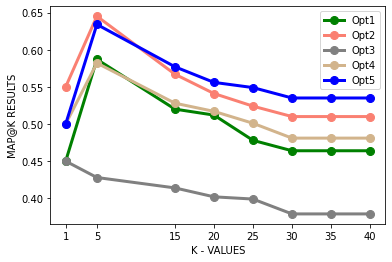

In [ ]:
map_at_k_for_versions(res1, res2, res3, res4, res5)

# Time Retrival:

In [ ]:
duration1 = np.mean([6.369189500808716, 10.632646799087524, 2.5111446380615234, 0.40261340141296387, 3.42334246635437, 0.36348485946655273, 8.806766748428345, 15.154053211212158, 1.5366864204406738, 5.835215091705322, 0.4259929656982422, 1.4170269966125488, 0.4093010425567627, 8.806294441223145, 1.2290310859680176, 0.47350502014160156, 2.716761350631714, 1.72343111038208, 4.922810792922974, 0.41286206245422363])
duration2 = np.mean([6.4861836433410645, 10.851101160049438, 2.3549184799194336, 0.40996813774108887, 3.4807417392730713, 0.4085428714752197, 8.703799724578857, 15.768251657485962, 1.740664005279541, 6.0788164138793945, 0.39909982681274414, 1.5086760520935059, 0.41448473930358887, 9.107337236404419, 1.3326938152313232, 0.46710896492004395, 2.911242723464966, 1.8424944877624512, 5.122312307357788, 0.4147460460662842])
duration3 = np.mean([6.912997484207153, 11.05759596824646, 2.550769329071045, 0.4113597869873047, 3.692655324935913, 0.43102478981018066, 8.887654781341553, 15.359169960021973, 1.651879072189331, 5.925051212310791, 0.4631075859069824, 1.5707488059997559, 0.42890501022338867, 9.00236201286316, 1.5381410121917725, 0.5051887035369873, 2.871584177017212, 1.943913459777832, 4.918992519378662, 0.5092580318450928])
duration4 = np.mean([6.811109781265259, 11.258445262908936, 2.4354653358459473, 0.42999696731567383, 3.588357448577881, 0.40759849548339844, 8.704532146453857, 15.654199361801147, 1.6013374328613281, 5.68114447593689, 0.5117466449737549, 1.510453701019287, 0.4348316192626953, 9.318114042282104, 1.3311843872070312, 0.46478915214538574, 3.0153214931488037, 1.737431526184082, 5.125262498855591, 0.4055147171020508])
duration5 = np.mean([6.56702995300293, 11.057655334472656, 2.3032050132751465, 0.3572719097137451, 3.381694793701172, 0.3767049312591553, 8.633476257324219, 15.667923927307129, 1.7404420375823975, 5.632979393005371, 0.41127800941467285, 1.5293538570404053, 0.3962526321411133, 9.435627460479736, 1.328174352645874, 0.4822232723236084, 2.896618127822876, 1.7409999370574951, 4.918163537979126, 0.4059712886810303])

In [ ]:
times = [duration1, duration2, duration3, duration4, duration5]

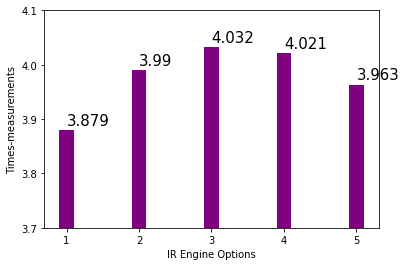

In [ ]:
def plot_retrival_time_for_option(times):
    N = len(times)+1
    times = [round(time, 3) for time in times]
    x = [i for i in range(1, N)]
    plt.bar(x, times, color='purple', width=0.2)
    plt.xticks(x)
    plt.ylim(3.7, 4.1)
    plt.yticks([3.7,3.8,3.9,4.0,4.1])
    plt.xlabel('IR Engine Options')
    plt.ylabel('Times-measurements')
    for a,b in zip(x, times): 
      plt.text(a, b+0.01, str(b), fontsize=15)
    plt.show()

plot_retrival_time_for_option(times)

# Final Stage: Test Our Engine 

In [ ]:
queris_test_dict = {"How to make hummus": [75065, 13607, 57146, 2243880, 48876576, 289691, 24230253, 47863605, 20657443, 22736969, 49643204, 3508935, 7489122, 3548013, 164311, 2578570, 1039663, 62166289, 3841447, 4925720, 56494240, 11287682, 453166, 8559295, 5033181, 682549, 11447140, 47863662, 1626287, 5334377, 37534432, 3099917, 2322115, 82789, 9513043, 607255, 317450, 14320, 7329519, 42006157, 13913, 31497735, 8564070, 3260137],
 "Winter": [34061, 8521120, 962053, 30276826, 20925895, 28483, 38950, 244878, 34069, 65602238, 33924, 33672235, 3548574, 109566, 66751284, 19431459, 211869, 3227879, 43343961, 1632099, 961505, 1221158, 1298502, 1088531, 200373, 22933429, 36480174, 18670284, 6170150, 58564, 3292487, 17349106, 1971153, 260683, 33634815, 16615604, 8778803, 65601132, 109565, 3060382, 1843684, 3719969, 1817908, 4886790, 19938267, 1799816, 9637495],
 "Rick and Morty": [41185040, 41283158, 65819511, 43794572, 57390230, 47762921, 49029294, 43794574, 67520032, 67830379, 51759111, 54046846, 55708102, 61805032, 41699729, 55339286, 49260717, 68010196, 51082764, 26091326, 49128142, 54802759, 55339299, 55339303, 52261594, 57314882, 63656365, 64413225, 49134382],
 "Natural Language processing": [21652, 67147, 98778, 40573, 37764426, 18784729, 1661566, 301999, 18863997, 64695824, 27837170, 43561218, 43771647, 61603971, 57932194, 62026514, 5561, 6650456, 21173, 32707853, 360030, 53358397, 32472154, 27857167, 563439, 20892159, 1732213, 1164, 56142183, 11147298, 4561188, 252008, 42799166, 10235, 1936537, 35715808, 14003441, 2891758, 36323189, 60360004],
 "World Cup 2022": [17742072, 11370, 29868391, 57240806, 57918704, 27226732, 57918701, 64112605, 57918697, 67608822, 51765484, 66040080, 57918706, 61872359, 8258172, 57918711, 3482503, 57918689, 11049, 59613812, 1248592, 62528055, 45271353, 59863995, 3556431, 65955719, 10822574],
 "Dolly the sheep": [9146, 1857574, 12054042, 42555506, 16285933, 52793670, 1631732, 9649607, 2082914, 17842616, 2828101, 1962277, 8716, 63031051, 1751707, 6910, 1140293, 14094, 168927, 2372209, 45485344, 39379960, 56398129, 1632972, 1321047, 6832430, 1567101, 383180, 192685, 53431353, 38889846, 1258132, 915258, 14020881, 48188481, 9556567, 1731036, 932553, 8394105, 18590036, 7932132],
 "What is the best place to live in?": [1664254, 48461477, 60333700, 33018516, 851512, 1649321, 22916979, 32028, 52749663, 31885991, 36040841, 33569489, 42881894, 1655287, 41940, 3367760, 5713554, 18110, 124779, 125558, 14649921, 66351400, 32950054, 260376, 126805, 32706, 45222463, 23189729, 3535679, 5407, 1978628, 13774, 18112665, 55166, 1387207, 139176, 56114, 5201333, 33323927, 93961, 214452, 2973070, 19394651, 37325161, 19159283, 309890, 1998],
 "Elon musk": [909036, 65175052, 65212863, 5533631, 832774, 47190535, 53215263, 36971117, 53615490, 4335905, 66405413, 9988187, 45111627, 51237650, 52247588, 48778030, 2614738, 41360413, 39636436, 803102, 31406060, 195809, 55382641],
 "How do you breed flowers?": [30876044, 16128216, 31552410, 200646, 41244, 407234, 6614349, 1183979, 233609, 13799261, 4576465, 63539530, 971961, 42680256, 33336442, 33131935, 55819873, 893280, 18967, 4226137, 68213121, 1028614, 63484108, 1104639, 39683, 63180590, 1390689, 73421, 26537, 167906, 3288269, 277231, 5902061, 57141131, 49883395, 19049100, 1071613, 18691124, 630109, 1392524, 76143, 430347, 66556, 35646178, 224785, 57374888, 267657, 57622]}

In [ ]:
true_docs_list_test = list(queris_test_dict.values())

### we choose to use option 5, let's test it on the test queries:

In [ ]:
def test_map_at_k(results): 
    x = k_values
    plt.plot(x, results, color='green', linewidth=3, marker='o', markersize=8)
    plt.xticks(x)
    plt.ylim(min(results)-0.01,max(results)+0.01)
    plt.xlabel('K - VALUES')
    plt.ylabel('MAP@K RESULTS')
    plt.show()

In [ ]:
time20 = [3.3086256980895996, 1.1879806518554688, 0.648942232131958, 4.605520725250244, 11.80177116394043, 0.5707809925079346, 13.272902488708496, 0.3609437942504883, 0.8866569995880127]
print(f"AVG retrival time on the test set for our best IR-Engine is: {np.mean(time20)}")

AVG retrival time on the test set for our best IR-Engine is: 4.07156941625807


In [ ]:
pred20 =[[75065, 37785018, 48876576, 56494240, 24230253, 16162840, 289691, 47886970, 7329519, 52682605, 47863662, 49643204, 7897152, 10122293, 62166289, 67420826, 32282924, 5764910, 24480734, 31497735], [5205816, 962053, 6857682, 38695012, 1332179, 47499664, 54008853, 982392, 43354682, 33528103, 33528313, 33529157, 33528065, 33527138, 61222605, 56831525, 26557772, 45318613, 45317995, 45318741], [41283158, 49128142, 67830379, 51082764, 41699729, 49134425, 62322971, 63656330, 51759111, 62417836, 68010196, 55339294, 63656365, 52262559, 49134382, 55339286, 49170369, 62417839, 55339278, 55339299], [37764426, 43771647, 1661566, 6650456, 252008, 486551, 36323189, 26600293, 30972465, 41996200, 5576666, 896932, 4045546, 7870797, 59271651, 45573515, 29116756, 67322380, 2891758, 29547984], [59863995, 64999924, 65870195, 62905543, 62905544, 63609874, 66119114, 58415610, 59863954, 67397628, 67679970, 63441569, 67896838, 63441518, 67191642, 65683611, 29061000, 65534827, 66257236, 65543203], [9146, 9649607, 192685, 62605848, 42555506, 45485344, 1857574, 17842616, 12054042, 7932132, 56398129, 1731036, 52793670, 16285933, 10392152, 1567101, 63031051, 1140293, 9402581, 40069126], [18705980, 2826922, 30103124, 53028651, 40007698, 18776966, 57746962, 48491391, 40032954, 42597449, 17289844, 13852470, 61482668, 28957619, 8305456, 59722818, 12777825, 49330725, 52464977, 55324413], [47190535, 66430882, 65212863, 65175052, 50399439, 43407192, 33986468, 803102, 41309419, 8046414, 21523886, 48778030, 2614738, 62405042, 55691368, 6836366, 49033638, 23286064, 59482698, 50041197], [30969343, 4876500, 43018316, 21263164, 22685825, 40290623, 274227, 33856341, 33437452, 12429861, 12427923, 8823742, 12187433, 38462192, 29598013, 2728692, 57141131, 50873525, 22274341, 47383878]]

In [ ]:
def evaluate_test(true_list, pred_list):
  print(f"This is the results for Option 5 for 10 queries:")
  res = []
  for k in k_values: 
    MAPK_score_for_k = MAP_at_K(true_list, pred_list, k)
    print(f"score for MAP@K={k} is: {MAPK_score_for_k}")
    print("_____________________________________________________________")
    res.append(MAPK_score_for_k)
  return res

test_results = evaluate_test(true_docs_list_test, pred20)

This is the results for Option 5 for 10 queries:
score for MAP@K=1 is: 0.667
_____________________________________________________________
score for MAP@K=5 is: 0.673
_____________________________________________________________
score for MAP@K=15 is: 0.62
_____________________________________________________________
score for MAP@K=20 is: 0.608
_____________________________________________________________
score for MAP@K=25 is: 0.608
_____________________________________________________________
score for MAP@K=30 is: 0.608
_____________________________________________________________
score for MAP@K=35 is: 0.608
_____________________________________________________________
score for MAP@K=40 is: 0.608
_____________________________________________________________


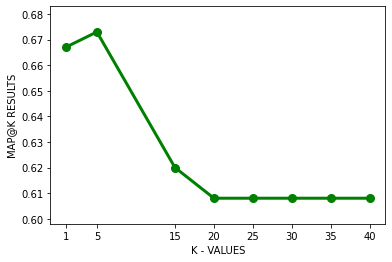

In [ ]:
test_map_at_k(test_results)